In [ ]:
#데이터셋이 달라서 트레인이하고 테스트를 나눠서 해야함
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
cancer_data = load_breast_cancer()
print(cancer_data.DESCR)

#결과 중에 이런 게 나옴    :Class Distribution: 212 - Malignant, 357 - Benign

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
print(cancer_data.data)
print(cancer_data.data.shape)
print(len(cancer_data.data[0]))

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)
30


In [ ]:
cancer_label = cancer_data.target
print(cancer_label[:50])
print(cancer_data.target_names)
#0이 malignant, 1이 benign

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1]
['malignant' 'benign']


In [ ]:
X_cancer = cancer_data.data
y_cancer = cancer_data.target
print(X_cancer.shape)
print(y_cancer.shape)

(569, 30)
(569,)




```
X_data => X_train, X_test
y_label => y_train, y_test
```



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [ ]:
#데이터 들여다보기
print(X_train[0])

[1.171e+01 1.545e+01 7.503e+01 4.203e+02 1.150e-01 7.281e-02 4.006e-02
 3.250e-02 2.009e-01 6.506e-02 3.446e-01 7.395e-01 2.355e+00 2.453e+01
 9.536e-03 1.097e-02 1.651e-02 1.121e-02 1.953e-02 3.100e-03 1.306e+01
 1.816e+01 8.416e+01 5.164e+02 1.460e-01 1.115e-01 1.087e-01 7.864e-02
 2.765e-01 7.806e-02]


In [ ]:
from sklearn.preprocessing import StandardScaler
#데이터를 보고 평균을 내서 적당하게 비슷한 크기로 맞춰줌

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled[0])
X_test_scaled = scaler.fit_transform(X_test)
print(X_test_scaled[0])

[-0.67250838 -0.88169713 -0.68400126 -0.65620791  1.26616453 -0.59892989
 -0.61076565 -0.41743652  0.73052228  0.29690769 -0.19407286 -0.87494232
 -0.23648817 -0.34269876  0.78608997 -0.83078617 -0.61135682 -0.05693644
 -0.11429109 -0.28989331 -0.65180467 -1.22605286 -0.67674596 -0.62462991
  0.54586162 -0.90124027 -0.79616973 -0.54605985 -0.22701594 -0.35174535]
[ 0.28243426 -1.51582059  0.21474907  0.15533702 -1.03556203 -0.80254492
 -0.399097   -0.46515876 -1.76289778 -0.96478192 -0.68310736 -1.54587704
 -0.63506154 -0.45262807 -1.02643368 -0.70148639 -0.38676551 -0.68350614
 -1.47558962 -0.63176187  0.18442442 -1.59602589  0.1491716   0.04804369
 -0.34505663 -0.1695088   0.10637474 -0.17343396 -1.04852136 -0.44776719]


In [ ]:
#64->32->10->1 (0이냐 1이냐->하나로 들어감) binary classification -> activation = 'sigmoid'
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation = 'relu', input_shape = (30,)),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.summary()

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_split = 0.2, epochs = 20)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,405 (17.21 KB)

 Trainable params: 4,405 (17.21 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5821 - loss: 0.7056 - val_accuracy: 0.7558 - val_loss: 0.5322
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7685 - loss: 0.5372 - val_accuracy: 0.9070 - val_loss: 0.4171
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8659 - loss: 0.4621 - val_accuracy: 0.9419 - val_loss: 0.3416
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9164 - loss: 0.3813 - val_accuracy: 0.9302 - val_loss: 0.2438
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9095 - loss: 0.2876 - val_accuracy: 0.9767 - val_loss: 0.1470
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9420 - loss: 0.1862 - val_accuracy: 0.9767 - val_loss: 0.1107
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9433 - loss: 0.1480 - val_accuracy: 0.9884 - val_loss: 0.0852
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9651 - loss: 0.1025 - val_accuracy: 0.9884 - val_loss



```
train의 확률이 더 높음.
```



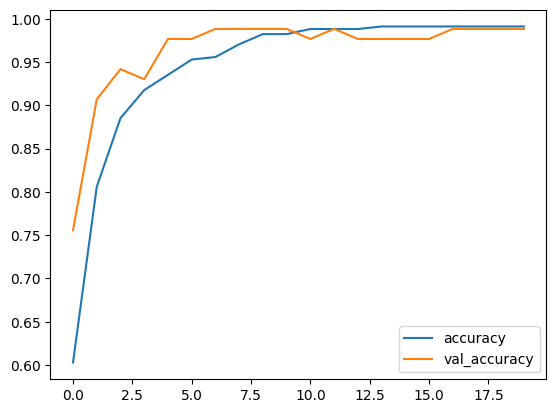

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

plt.plot(acc, label = 'accuracy')
plt.plot(val_acc, label = 'val_accuracy')

plt.legend()
plt.show()

In [ ]:
y_predictions = model.predict(X_test_scaled)
print(y_predictions[:5])
#기준을 정해주자. 몇 이상을 1로, 이하를 0으로 할지 나중에 재현율을 보면서 조정
import numpy as np
#y_predictions_label = np.where(y_predictions > 0.5, 1, 0) #0.5보다 크면 1로 두고 아니면 0으로 둬
y_predictions_label = np.where(y_predictions > 0.5, 1, 0).flatten() #0.5보다 높이면 암이 아닌 걸 아니라고 할 확률이 줄어듦 0이 많은 게 더 나은 거. 그래야 recall 확률이 올라간다. 암에서는 재현율이 높은 게 나으니까.
print(y_predictions_label[:5])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
[[0.9958564 ]
 [0.99870205]
 [0.9984554 ]
 [0.9999997 ]
 [0.00351927]]
[1 1 1 1 0]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test,
                               y_predictions_label,
                               target_names = cancer_data.target_names)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.98      0.99      0.98        91

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

